# K Nearest Neighbor & the Iris Dataset

The following notebook is a combination of guided EDA and one-v-rest classification. All credit to the original authors. 

Your job is to fill in the missing code-blocks and analyze the outputs that your code produces.

Credit to [skalskip](https://www.kaggle.com/skalskip) for knn notebook.

Credit to [prashant111](https://www.kaggle.com/prashant111) for the evaluation metrics notebook.

Modifications to instructions and code are indicated via a note from me: (*Note*: ...)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
# Load in iris dataset
dataset = pd.read_csv("_ _ _")

## The Algo

KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations  (x,y) and would like to capture the relationship between x and y. 

More formally, our goal is to learn a function  h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

 ### Distance Measure

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples. 
 
Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

## Dividing data into features and labels

NOTE: As we can see dataset contain six columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. The actual features are described by columns 1-4. Last column contains labels of samples. Firstly we need to split data into two arrays: X (features) and y (labels).

In [6]:
# place all numerical features into the "X" dataset
feature_columns = ['sepal.length', 'sepal.width', 'petal.length','petal.width']
X = dataset[_ _ _].values

# select species as your target
y = dataset['variety'].values

## Label Encoding

NOTE: As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [9]:
# encode species data into numerical

le = LabelEncoder()
y = le.fit_transform(y)

## Spliting dataset into training set and test set

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [10]:
# Split your data into training and test data. Test set should be of size 0.25
X_train, X_test, y_train, y_test = _ _ _

## Pairplot

(*Note*: While we did do an EDA yesterday, let's view our clusters and their traits once more)

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Figure size 640x480 with 0 Axes>

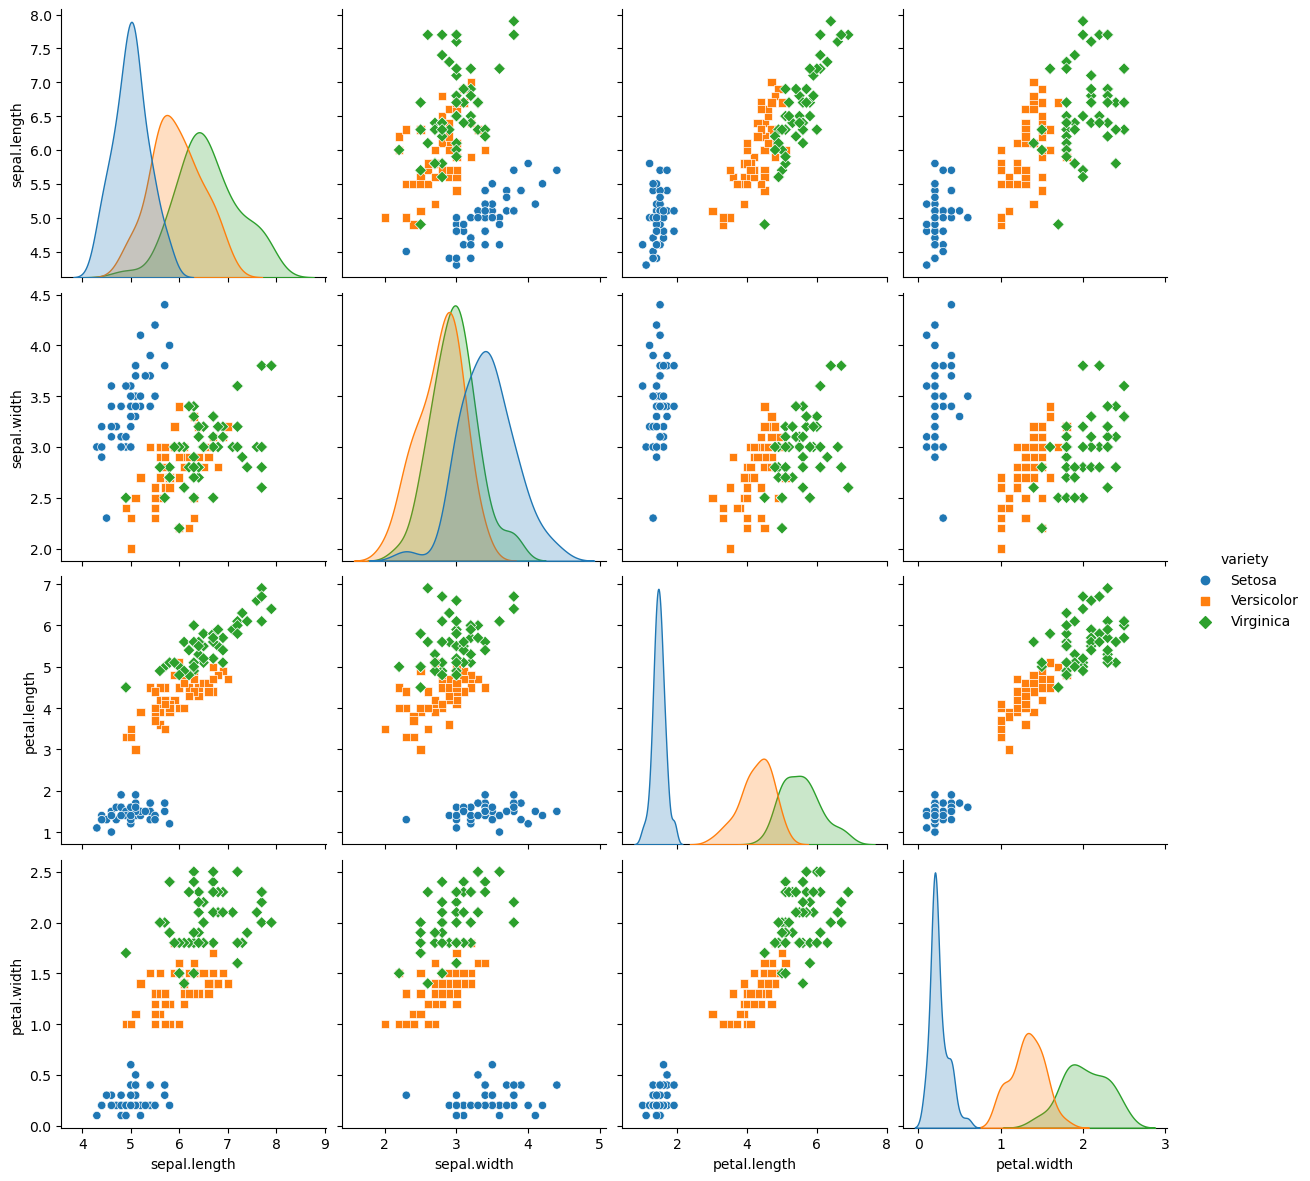

In [12]:
# plot a pairplot. Signify different variety via the "hue" parameter

plt.figure()
sns.pairplot(dataset, hue = "_ _ _", size=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

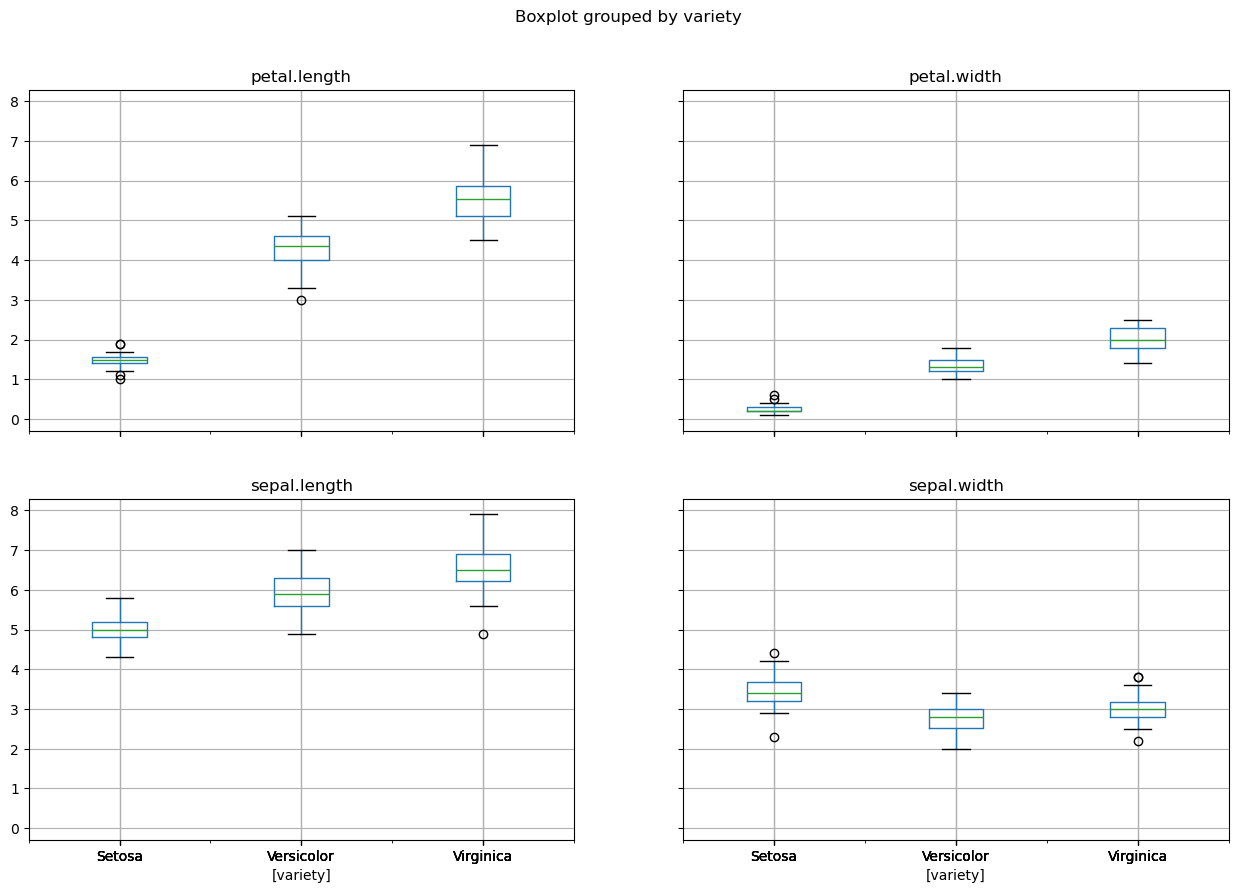

In [13]:
# plot a boxplot to view numerical traits of clusters

plt.figure()
dataset.boxplot(by="variety", figsize=(15, 10))
plt.show()

## Build a Model

(*Note*: Let's first preprocess our data via a standardscaler)

In [14]:
numerical_columns = ['sepal.length','sepal.width','petal.length','petal.width']

# create a standard scaler object
scaler = _ _ _()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(dataset[_ _ _])

scaled_numerical

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [15]:
# Instantiate learning model with 3 neighbors
classifier = KNeighborsClassifier(_ _ _=_ _ _)

# Fit the model on your training data
classifier.fit(_ _ _, _ _ _)

# Predicting the XTest set results
y_pred = classifier.predict(_ _ _)

## Evaluating predictions

In [16]:
# Building confusion matrix:

cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]], dtype=int64)

In [17]:
# Compare the train-set and test-set accuracy

# Calculate the model train accuracy:
y_pred_train = classifier.predict(_ _ _)

accuracy_train = accuracy_score(y_train, y_pred_train)*100
print('Training-set accuracy score:' + str(round(accuracy_train, 2)) + ' %.')

# Calculating model test accuracy:

accuracy_test = accuracy_score(y_test, y_pred)*100
print('Testing-set accuracy score:' + str(round(accuracy_test, 2)) + ' %.')

Training-set accuracy score:96.43 %.
Testing-set accuracy score:94.74 %.


## Compare model accuracy with null accuracy

We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [19]:
# check class distribution in test set by using the "value_counts" function

pd.Series(y_test)._ _ _()

2    13
1    13
0    12
Name: count, dtype: int64

In [20]:
# check null accuracy score

null_accuracy = (13/(13+12+12))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.3514


## Hyperparameter Tuning

I have built the kNN classification model using k=3. Now, I will increase the value of k and see its effect on accuracy

In [21]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

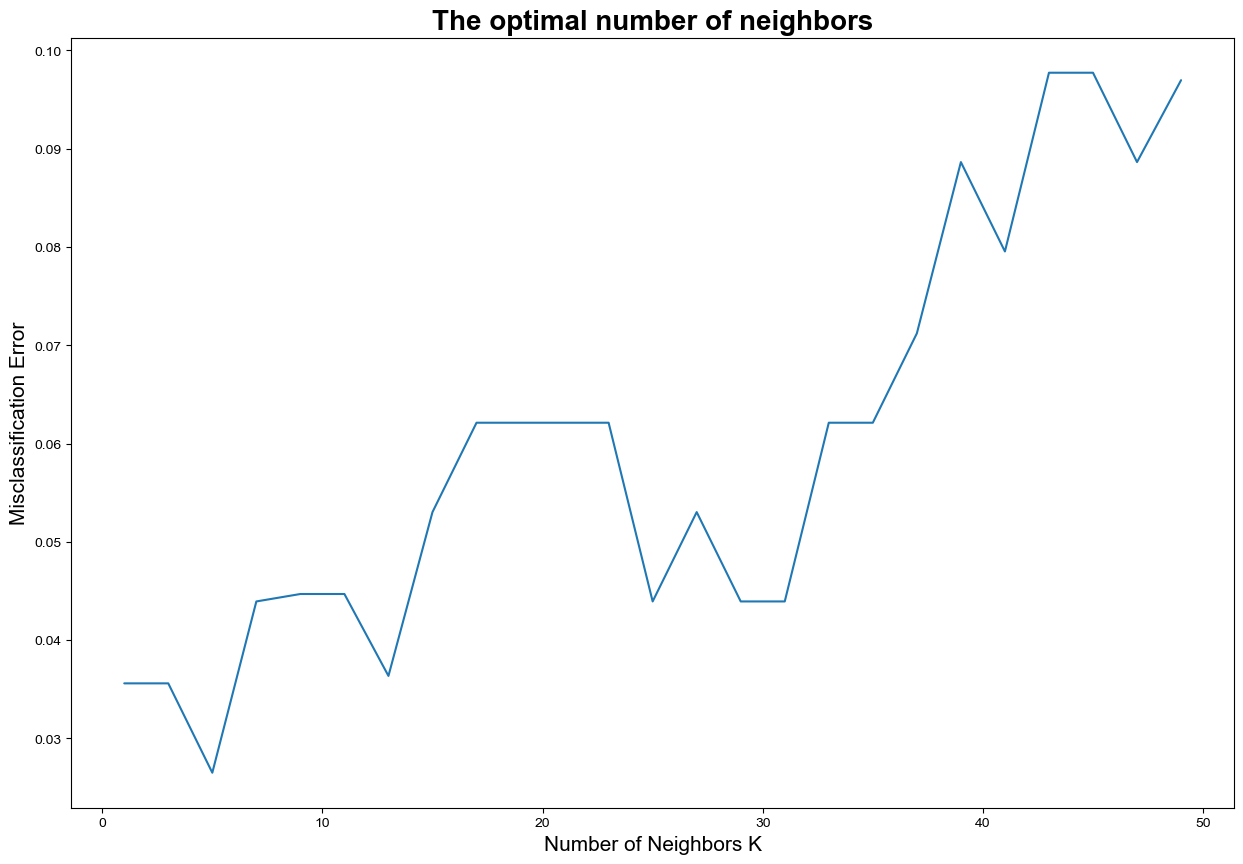

In [22]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## Manhattan Distance

Does using a different distance metric change performance?

In [25]:
# creating list of K for KNN 
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation with "manhattan" set for metric
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, metric='_ _ _')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

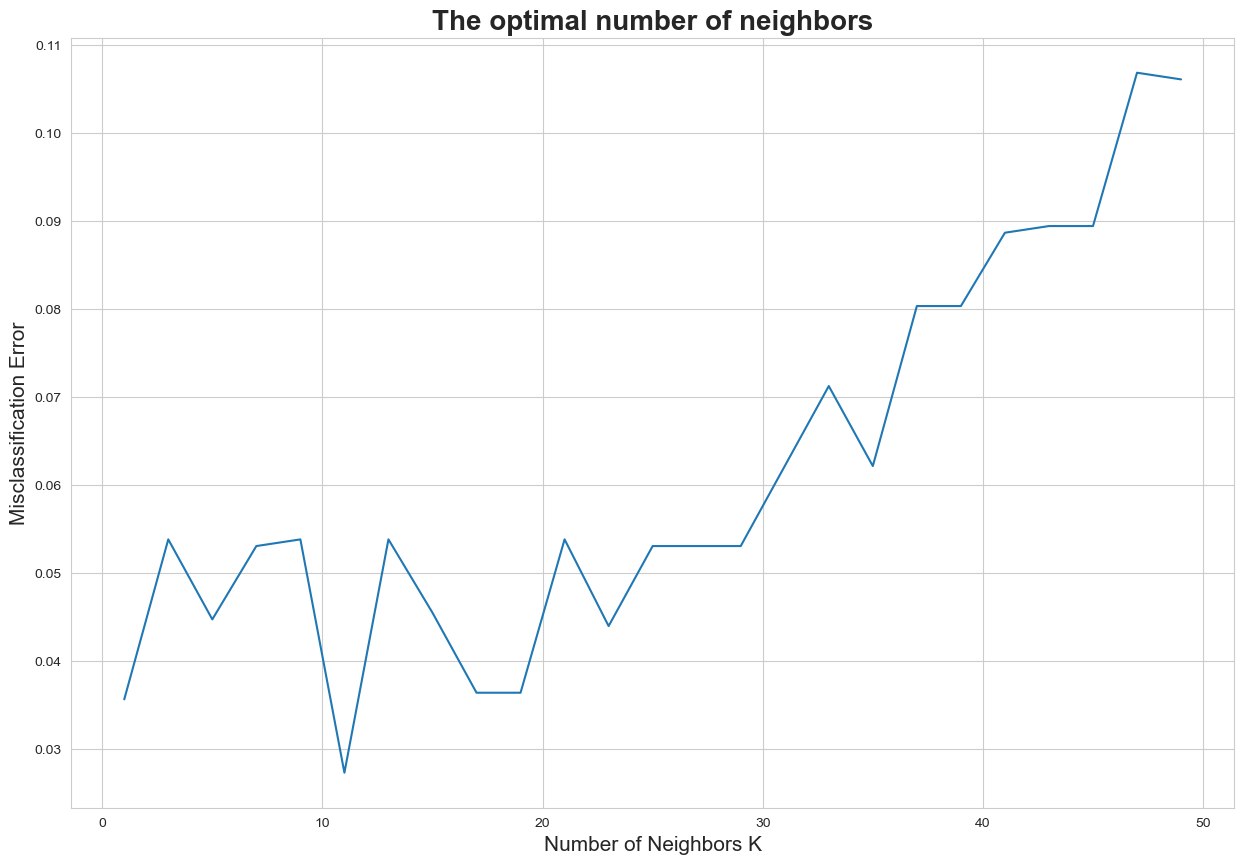

In [26]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

## Classification metrices

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

